In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/DOAM/list order_monthly.csv")

In [ ]:
# data

,product_id,product_name,sku,quantity,date_month
0,101245,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1
1,101247,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1
2,101248,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1
3,101249,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1
4,101255,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1
...,...,...,...,...,...
3627,970747,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,573,11
3628,996504,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11
3629,996505,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11
3630,997304,Mixsoon Ecobag 2022,MS-EB-2022,15,11


In [ ]:
# data.dtypes

product_id       int64
product_name    object
sku             object
quantity         int64
date_month       int64
dtype: object

In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3632 non-null   int64 
 1   product_name  3632 non-null   object
 2   sku           3632 non-null   object
 3   quantity      3632 non-null   int64 
 4   date_month    3632 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 142.0+ KB


# 1. Detection module (Moving Average and Standard Deviation)
   - Data Preprocessing
   - Calculate Moving Average: Compute the average order quantity over the past N months (e.g., 3 months) for each product.
   - Calculate Standard Deviation: Calculate the standard deviation of order quantities for the same period.
   - Detect Anomalies: If the recent order quantity for a product exceeds the moving average plus a certain number of standard deviations

In [ ]:
# Calculate Moving Average: Compute the average order quantity over the past N months (e.g., 3 months) for each product

# # Convert 'date_month' column to datetime
# data['date_month'] = pd.to_datetime(data['date_month'], format='%m')

# # Sort DataFrame by 'product_name' and 'date_month'
# data.sort_values(['product_name', 'date_month'], inplace=True)

# Calculate 3-month moving average for each product
# N = 3
# data['moving_average'] = data.groupby('product_name')['quantity'].transform(lambda x: x.rolling(window=N, min_periods=1).mean())
# data


,product_name,sku,quantity,date_month,moving_average
0,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1,1.000000
1,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1,3.000000
2,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1,5.000000
3,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1,4.000000
4,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1,295.000000
...,...,...,...,...,...
3627,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,570,11,490.666667
3628,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11,1.333333
3629,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11,3.666667
3630,Mixsoon Ecobag 2022,MS-EB-2022,15,11,11.000000


from matplotlib import pyplot as plt
data['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['date_month'].plot(kind='hist', bins=20, title='date_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['moving_average'].plot(kind='hist', bins=20, title='moving_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='quantity', y='date_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='date_month', y='moving_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_month']
  ys = series['quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_month')
_ = plt.ylabel('quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_month']
  ys = series['moving_average']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_month')
_ = plt.ylabel('moving_average')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_month'}, axis=1)
              .sort_values('date_month', ascending=True))
  xs = counted['date_month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['date_month'].plot(kind='line', figsize=(8, 4), title='date_month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['moving_average'].plot(kind='line', figsize=(8, 4), title='moving_average')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# result_row = data.loc[3]
# print(result_row[['sku', 'quantity', 'date_month', 'moving_average']])

sku               BBA-CS-05-R
quantity                    4
date_month                  1
moving_average            4.0
Name: 3, dtype: object


In [ ]:
# Calculate Standard Deviation: Calculate the standard deviation of order quantities for the same period.
# std_deviation = data.groupby('product_name')['quantity'].std()
# std_deviation

product_name
 Hince Mood Enhancer Water Liquid Glow mini - W003 Harmonious                                                           NaN
#06 Starry Night - Eglips Flash Shadow Palette                                                                     0.707107
Asia edition gift box Ver 2                                                                                       13.950707
BBIA L EAU TINT - #01 GARDENIA L EAU                                                                                    NaN
BBIA L EAU TINT - #02 FLEUR L EAU                                                                                       NaN
                                                                                                                    ...    
[Mua 1 son Tặng 1 sticker] Son Kem Lì Bbia Last Velvet Lip Tint Version 5 - 25 Final Note (Màu Đỏ Nâu Đất) 5g    249.608694
[Mua 1 tặng 1 quà] Bbia Ready To Wear Powder Cheek                                                                 2.08

In [ ]:
data_daily = pd.read_csv("/content/drive/MyDrive/DOAM/list order_daily.csv")
data_daily

,id,product_id,quantity,ord_category,post_date
0,1072066,109982,1,26,1/1/2023 0:00
1,1072066,1017426,1,26,1/1/2023 0:00
2,1072067,486353,1,10,1/1/2023 0:00
3,1072068,872933,1,10,1/1/2023 0:00
4,1072069,232309,1,10,1/1/2023 0:01
...,...,...,...,...,...
423011,1406951,1045516,25,7,11/16/2023 10:51
423012,1406951,1105775,10,7,11/16/2023 10:51
423013,1406951,1359084,35,7,11/16/2023 10:51
423014,1406951,1359085,60,7,11/16/2023 10:51


In [ ]:
data_daily

,id,product_id,quantity,ord_category,post_date
0,1072066,109982,1,26,1/1/2023 0:00
1,1072066,1017426,1,26,1/1/2023 0:00
2,1072067,486353,1,10,1/1/2023 0:00
3,1072068,872933,1,10,1/1/2023 0:00
4,1072069,232309,1,10,1/1/2023 0:01
...,...,...,...,...,...
423011,1406951,1045516,25,7,11/16/2023 10:51
423012,1406951,1105775,10,7,11/16/2023 10:51
423013,1406951,1359084,35,7,11/16/2023 10:51
423014,1406951,1359085,60,7,11/16/2023 10:51


In [ ]:
data_daily.dtypes

id               int64
product_id       int64
quantity         int64
ord_category     int64
post_date       object
dtype: object

In [ ]:
# Convert 'date' column to datetime
data_daily["post_date"] = pd.to_datetime(data_daily["post_date"])
data_daily["Year"]=data_daily.post_date.dt.year
data_daily["Month"]=data_daily.post_date.dt.month
data_daily["Weekday"]=data_daily.post_date.dt.day_name()

In [ ]:
data_daily.head()

,id,product_id,quantity,ord_category,post_date,Year,Month,Weekday
0,1072066,109982,1,26,2023-01-01 00:00:00,2023,1,Sunday
1,1072066,1017426,1,26,2023-01-01 00:00:00,2023,1,Sunday
2,1072067,486353,1,10,2023-01-01 00:00:00,2023,1,Sunday
3,1072068,872933,1,10,2023-01-01 00:00:00,2023,1,Sunday
4,1072069,232309,1,10,2023-01-01 00:01:00,2023,1,Sunday


In [ ]:
# Extract Year and Month from 'post_date'
data_daily['date_month'] = data_daily['post_date'].dt.date

# Group by 'product_id' and 'Year_Month', then sum the 'quantity' for each group
result_df = data_daily.groupby(['product_id', 'date_month'])['quantity'].sum().reset_index()
print(result_df)

       product_id  date_month  quantity
0           10626  2023-02-13         1
1           10626  2023-02-14         1
2           10626  2023-03-01         2
3           10626  2023-05-31         1
4           34217  2023-01-01         1
...           ...         ...       ...
36136     1393289  2023-11-23         1
36137     1393289  2023-11-24        13
36138     1393289  2023-11-25         6
36139     1393289  2023-11-26         3
36140     1393289  2023-11-27         2

[36141 rows x 3 columns]


In [ ]:
# Calculate the mean quantity for each product_id
mean_quantity_per_product = result_df.groupby('product_id')['quantity'].mean().reset_index()
mean_quantity_per_product

,product_id,quantity
0,10626,1.250000
1,34217,1.253012
2,34219,1.235294
3,34221,1.786517
4,34222,1.382353
...,...,...
741,1392332,138.666667
742,1392333,43.500000
743,1392334,386.500000
744,1392335,415.500000


In [ ]:
# Merge the mean quantity values back to the original DataFrame
df = pd.merge(result_df, mean_quantity_per_product, on='product_id', suffixes=('', '_mean'))
df

,product_id,date_month,quantity,quantity_mean
0,10626,2023-02-13,1,1.250000
1,10626,2023-02-14,1,1.250000
2,10626,2023-03-01,2,1.250000
3,10626,2023-05-31,1,1.250000
4,34217,2023-01-01,1,1.253012
...,...,...,...,...
36136,1393289,2023-11-23,1,5.153846
36137,1393289,2023-11-24,13,5.153846
36138,1393289,2023-11-25,6,5.153846
36139,1393289,2023-11-26,3,5.153846


In [ ]:
# Filter rows where 'quantity' is smaller than the mean value for each product_id
filtered_df = df[df['quantity'] < df['quantity_mean']]

filtered_df = filtered_df.drop('quantity_mean', axis=1)
filtered_df

,product_id,date_month,quantity
0,10626,2023-02-13,1
1,10626,2023-02-14,1
3,10626,2023-05-31,1
4,34217,2023-01-01,1
5,34217,2023-01-02,1
...,...,...,...
36134,1393289,2023-11-19,2
36135,1393289,2023-11-20,1
36136,1393289,2023-11-23,1
36139,1393289,2023-11-26,3


In [ ]:
mean_qty_per_prd_normal = filtered_df.groupby('product_id')['quantity'].mean().reset_index()
mean_qty_per_prd_normal

,product_id,quantity
0,10626,1.000000
1,34217,1.000000
2,34219,1.000000
3,34221,1.000000
4,34222,1.000000
...,...,...
523,1392332,27.500000
524,1392333,28.000000
525,1392334,128.000000
526,1392335,118.000000


In [ ]:
mean_qty_per_prd_max = filtered_df.groupby('product_id')['quantity'].max().reset_index()
mean_qty_per_prd_max

,product_id,quantity
0,10626,1
1,34217,1
2,34219,1
3,34221,1
4,34222,1
...,...,...
523,1392332,54
524,1392333,28
525,1392334,128
526,1392335,118


In [ ]:
threshold_per_prod = mean_qty_per_prd_max['quantity']/mean_qty_per_prd_normal['quantity']
threshold_per_prod

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
523    1.963636
524    1.000000
525    1.000000
526    1.000000
527    1.894737
Name: quantity, Length: 528, dtype: float64

In [ ]:
threshold_per_prod.max()

6.0

In [ ]:
# Calculate Moving Average: Compute the average order quantity over the past N months (e.g., 3 months) for each product.
# remove spike days
filtered_df_normal = result_df[result_df['quantity'] < 6]
filtered_df_normal

,product_id,date_month,quantity
0,10626,2023-02-13,1
1,10626,2023-02-14,1
2,10626,2023-03-01,2
3,10626,2023-05-31,1
4,34217,2023-01-01,1
...,...,...,...
36134,1393289,2023-11-19,2
36135,1393289,2023-11-20,1
36136,1393289,2023-11-23,1
36139,1393289,2023-11-26,3


In [ ]:
filtered_df_normal.dtypes

product_id     int64
date_month    object
quantity       int64
dtype: object

In [ ]:
filtered_df_normal.date_month = pd.to_datetime(df.date_month)
filtered_df_normal['month'] = filtered_df_normal.date_month.dt.month
filtered_df_normal = filtered_df_normal.groupby(['product_id', 'month'])['quantity'].sum().reset_index()
filtered_df_normal

,product_id,month,quantity
0,10626,2,2
1,10626,3,2
2,10626,5,1
3,34217,1,12
4,34217,2,13
...,...,...,...
3466,1389073,11,7
3467,1389074,11,8
3468,1392329,11,2
3469,1392332,11,1


In [ ]:
filtered_df_normal.dtypes

product_id    int64
month         int64
quantity      int64
dtype: object

In [ ]:
# Calculate the moving average for each product_id
filtered_df_normal['moving_average'] = filtered_df_normal.groupby('product_id')['quantity'].rolling(window=3, min_periods=1).mean().reset_index(drop=True)
filtered_df_normal[['product_id', 'month', 'quantity', 'moving_average']]

,product_id,month,quantity,moving_average
0,10626,2,2,2.000000
1,10626,3,2,2.000000
2,10626,5,1,1.666667
3,34217,1,12,12.000000
4,34217,2,13,12.500000
...,...,...,...,...
3466,1389073,11,7,7.000000
3467,1389074,11,8,8.000000
3468,1392329,11,2,2.000000
3469,1392332,11,1,1.000000


In [ ]:
def detect_anomalies(df, column='quantity', window_size=3, threshold_std=6):
    # Calculate the moving average for each product_id
    df['moving_average'] = df.groupby('product_id')['quantity'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True)

    # Calculate the standard deviation for each product_id
    df['std_dev'] = df.groupby('product_id')['quantity'].rolling(window=window_size, min_periods=1).std().reset_index(drop=True)

    # Detect anomalies
    df['is_anomaly'] = df[column] > (df['moving_average'] + threshold_std * df['std_dev'])

    # Return both True and False values in 'is_anomaly' column
    return df, df[df['is_anomaly']]

df = pd.DataFrame(filtered_df_normal)

# Set the threshold for anomalies (e.g., 1 standard deviation)
threshold_std = 1

# Apply the detect_anomalies function
original_df, anomaly_rows = detect_anomalies(df, threshold_std=threshold_std)

# Print the result
print("Original DataFrame:")
print(original_df[['product_id', 'month', 'quantity', 'moving_average', 'std_dev', 'is_anomaly']])

print("\nAnomaly Rows:")
print(anomaly_rows[['product_id', 'month', 'quantity', 'moving_average', 'std_dev', 'is_anomaly']])



Original DataFrame:
      product_id  month  quantity  moving_average   std_dev  is_anomaly
0          10626      2         2        2.000000       NaN       False
1          10626      3         2        2.000000  0.000000       False
2          10626      5         1        1.666667  0.577350       False
3          34217      1        12       12.000000       NaN       False
4          34217      2        13       12.500000  0.707107       False
...          ...    ...       ...             ...       ...         ...
3466     1389073     11         7        7.000000       NaN       False
3467     1389074     11         8        8.000000       NaN       False
3468     1392329     11         2        2.000000       NaN       False
3469     1392332     11         1        1.000000       NaN       False
3470     1393289     11        19       19.000000       NaN       False

[3471 rows x 6 columns]

Anomaly Rows:
      product_id  month  quantity  moving_average    std_dev  is_anomaly
5  

In [ ]:
filtered_df_normal['is_anomaly'].value_counts()

False    3132
True      339
Name: is_anomaly, dtype: int64

# **2. Detection module (Time Series Analysis)**
   - Data Preprocessing => donot need much preprocess because of not having missing values
   - Model Selection and Training: Choose a time series model, like ARIMA, and train it with historical data.
   - Prediction and Detection: Use the model to make predictions. If recent order quantities significantly deviate from these predictions, it may indicate an anomaly.

# Quantity orders Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import seaborn as sns
import seaborn as sb
import math
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as matplt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
filtered_df_normal['label'] = filtered_df_normal['quantity'].shift(periods=-1)

In [ ]:
#  using filtered_df_normal df
### split dataset by date
train, test = filtered_df_normal[filtered_df_normal["month"] <= 7],filtered_df_normal[filtered_df_normal["month"] > 7]
X_train ,y_train = train[["quantity","product_id"]], train["label"]
X_test ,y_test = test[["quantity","product_id"]], test["label"]

In [ ]:
X_train

,quantity,product_id
0,2,10626
1,2,10626
2,1,10626
3,12,34217
4,13,34217
...,...,...
3400,1,1290743
3401,1,1290744
3403,2,1299420
3405,1,1299422


In [ ]:
train["quantity"]

0        2
1        2
2        1
3       12
4       13
        ..
3400     1
3401     1
3403     2
3405     1
3406     1
Name: quantity, Length: 2220, dtype: int64

In [ ]:
import math
from datetime import datetime, date
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sn

import statsmodels as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

SEED = 42
np.random.seed(SEED)

lag_acf = 15
lag_pacf = 15
height = 4
width = 12

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(train[train["product_id"] == 34217]['quantity'])

ADF Statistic: -3.602268
p-value: 0.005718
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Non-stationary


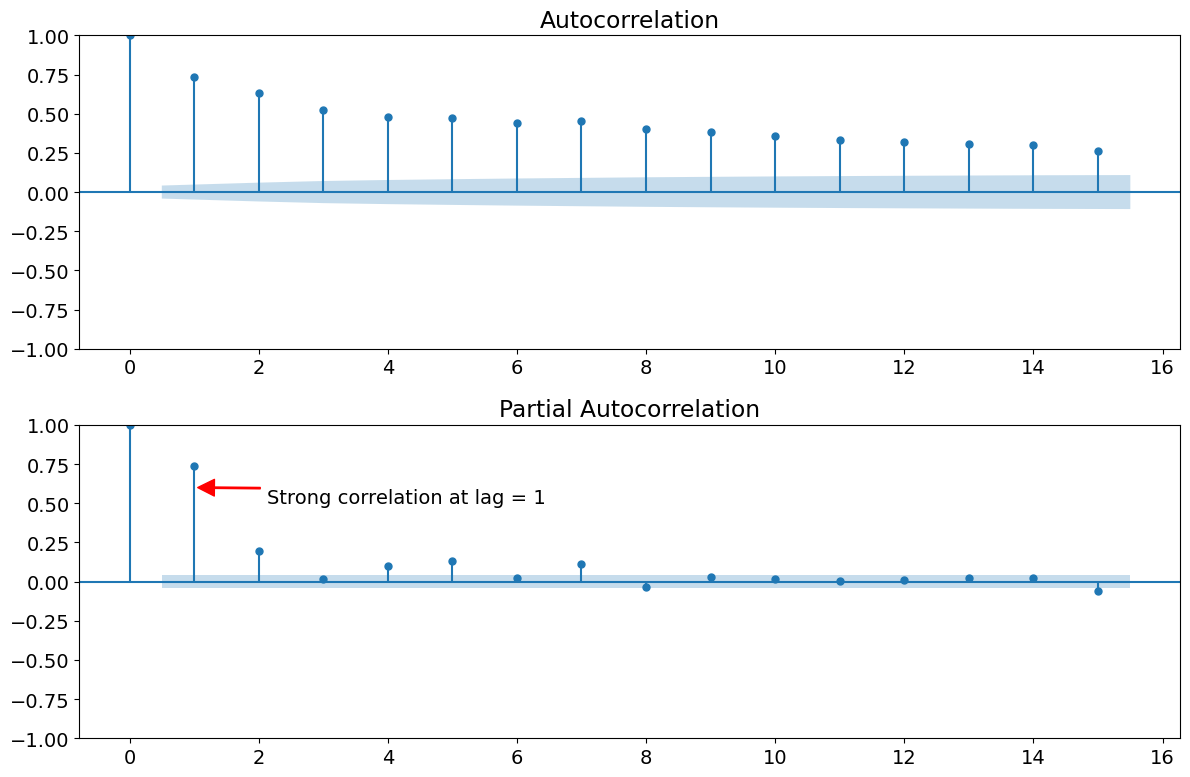

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(train['quantity'],lags=lag_acf, ax=ax[0])
plot_pacf(train['quantity'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train['quantity'], order = (1, 1, 1)) # p,m,q: dieu chinh predict value vs data qk p: 1 value qk-> 1 value tuong lai
model = model_arima.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                 2220
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8490.834
Date:                Wed, 29 Nov 2023   AIC                          16987.668
Time:                        03:26:47   BIC                          17004.783
Sample:                             0   HQIC                         16993.919
                               - 2220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5023      0.020     25.174      0.000       0.463       0.541
ma.L1         -0.8858      0.011    -78.390      0.000      -0.908      -0.864
sigma2       123.2984      2.018     61.091      0.0

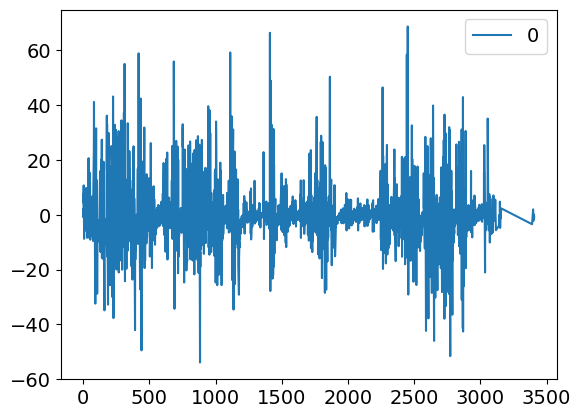

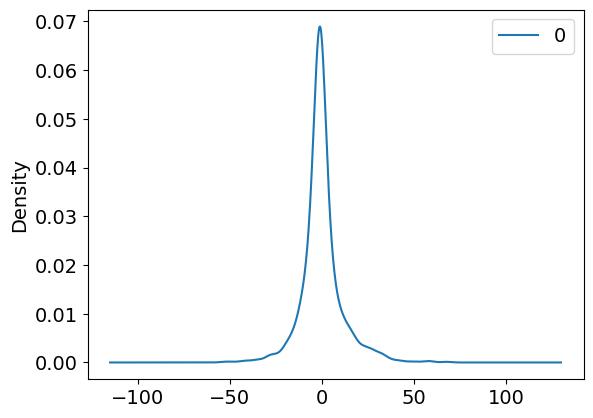

                 0
count  2220.000000
mean     -0.003047
std      11.104863
min     -53.874924
25%      -4.441911
50%      -0.851236
75%       3.207037
max      68.698186


In [ ]:
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

# Evaluate Test

Test RMSE: 9.205


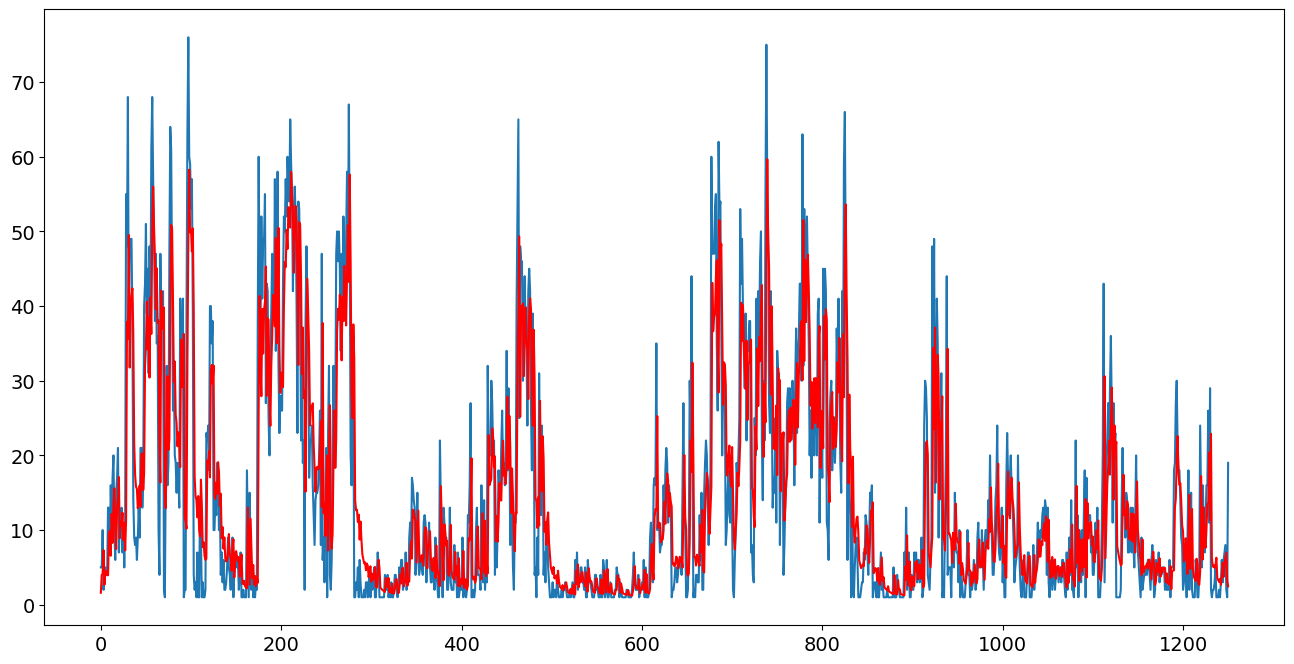

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# evaluate on split case 1
history = train["quantity"].values.tolist()
test_ = test["quantity"].values.tolist()
predictions = list()
for index in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    obs = test_[index]
    history.append(obs)
 # print('predicted=%f, expected=%f' % (y_pred, obs))

rmse = sqrt(mean_squared_error(test_, predictions))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test["quantity"].reset_index(drop = True))
plt.plot(predictions, color='red')
plt.show()

In [ ]:
train

,item,product_id,month,quantity,moving_average,std_dev,is_anomaly,label
0,1.0,10626,2,2,2.000000,NaN,False,2.0
1,2.0,10626,3,2,2.000000,0.000000,False,1.0
2,3.0,10626,5,1,1.666667,0.577350,False,12.0
3,NaN,34217,1,12,12.000000,NaN,False,13.0
4,NaN,34217,2,13,12.500000,0.707107,False,18.0
...,...,...,...,...,...,...,...,...
3400,NaN,1290743,7,1,1.000000,NaN,False,1.0
3401,NaN,1290744,7,1,1.000000,NaN,False,6.0
3403,NaN,1299420,7,2,2.000000,NaN,False,1.0
3405,NaN,1299422,7,1,1.000000,NaN,False,1.0


Error for product_id 232308: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 629728: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 672058: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 835746: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 835749: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 887579: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 966458: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 966465: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 1152045: too many indices for array: array is 0-dimensional, but 1 were indexed
Error for product_id 1157246: too many indices for array: array is 0-dimensional, but 1 were indexe

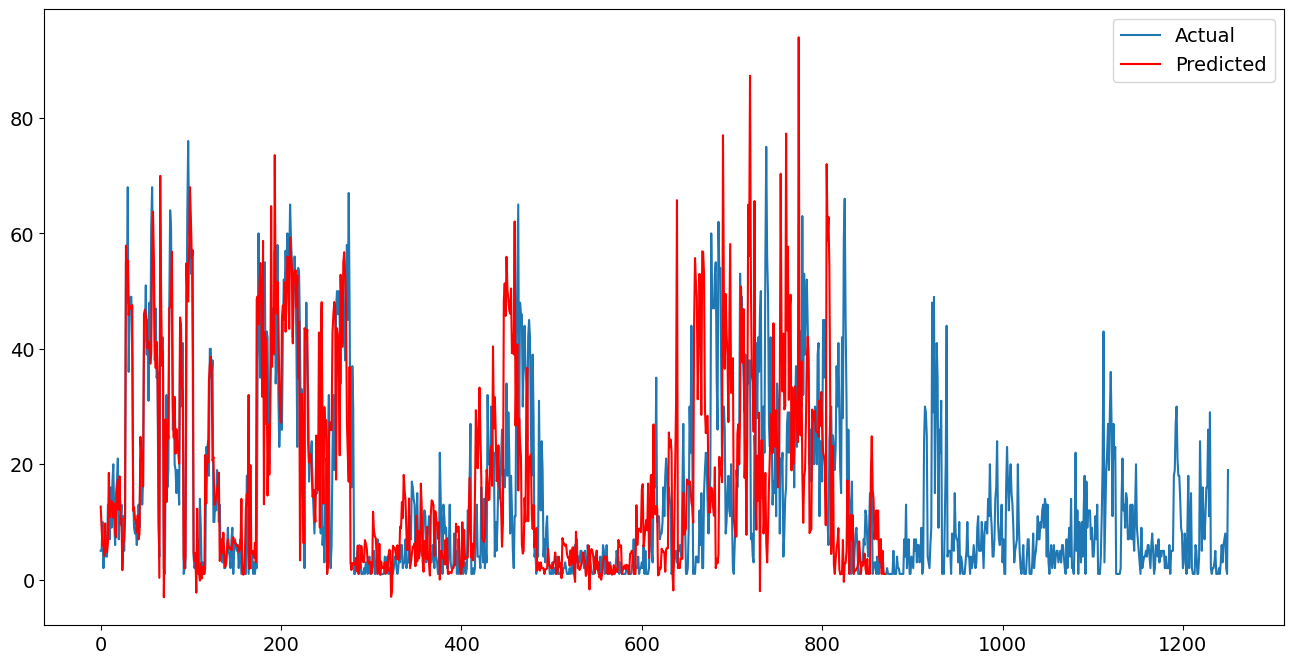

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictions = []
test_item = []

for item in train['product_id'].unique():
    # Initialize history for each product_id
    history = train.loc[train['product_id'] == item, 'quantity'].tolist()

    # Filter testing data for the current product_id
    test_ = X_test[X_test["product_id"] == item]["quantity"].values.tolist()

    try:
        for obs in test_:
            # Fit ARIMA model
            model = ARIMA(history, order=(1, 1, 1))
            model_fit = model.fit()

            # Make a forecast
            output = model_fit.forecast()
            y_pred = output[0]

            # Append predictions and test_item lists
            predictions.append(y_pred)
            test_item.append(obs)

            # Update the history with the observed value
            history.append(obs)

    except Exception as e:
        print(f"Error for product_id {item}: {e}")
        continue

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_item, predictions))
print('Test RMSE: %.3f' % rmse)

# Plotting
plt.figure(figsize=(16, 8))
# Replace 'quantity' with your actual column name for the y-axis
plt.plot(X_test['quantity'].reset_index(drop=True), label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()



In [ ]:
test

,product_id,month,quantity,moving_average,std_dev,is_anomaly,label
10,34217,8,5,7.666667,2.516611,False,5.0
11,34217,9,5,6.000000,1.732051,False,10.0
12,34217,10,10,6.666667,2.886751,True,2.0
13,34217,11,2,5.666667,4.041452,False,11.0
21,34219,8,5,5.000000,4.000000,False,5.0
...,...,...,...,...,...,...,...
3466,1389073,11,7,7.000000,NaN,False,8.0
3467,1389074,11,8,8.000000,NaN,False,2.0
3468,1392329,11,2,2.000000,NaN,False,1.0
3469,1392332,11,1,1.000000,NaN,False,19.0


In [ ]:
test = test.reset_index(drop = True)
test

,product_id,month,quantity,moving_average,std_dev,is_anomaly,label
0,34217,8,5,7.666667,2.516611,False,5.0
1,34217,9,5,6.000000,1.732051,False,10.0
2,34217,10,10,6.666667,2.886751,True,2.0
3,34217,11,2,5.666667,4.041452,False,11.0
4,34219,8,5,5.000000,4.000000,False,5.0
...,...,...,...,...,...,...,...
1246,1389073,11,7,7.000000,NaN,False,8.0
1247,1389074,11,8,8.000000,NaN,False,2.0
1248,1392329,11,2,2.000000,NaN,False,1.0
1249,1392332,11,1,1.000000,NaN,False,19.0


In [ ]:
predictions

[12.6685697051971,
 8.881426040303143,
 5.901596618519776,
 6.398499224713485,
 4.133461564863627,
 9.754694829887978,
 5.499182791207575,
 4.767852031722063,
 6.384028332041845,
 18.512744455254,
 10.82035727792993,
 11.912629546213033,
 13.63809541640603,
 12.641796663229462,
 10.777594162447581,
 13.15056667989001,
 8.056672152620392,
 7.348795495472343,
 15.709995869627152,
 17.287086973703992,
 12.106816208401685,
 17.90403411329691,
 9.592518537015529,
 10.605621542513513,
 1.64736245064889,
 5.940857469923466,
 7.449826556558806,
 10.634562412997532,
 57.87638398349108,
 52.928166538067806,
 55.33600058183571,
 45.86347982358223,
 47.44419378152884,
 46.9931033083506,
 47.433291529887505,
 47.57602867056902,
 11.938215956330717,
 12.521290945533133,
 10.546673505571038,
 9.998051310208115,
 8.225037888787314,
 11.14303165752058,
 6.986676819324219,
 7.982854982895368,
 24.74202710842732,
 21.83735670666065,
 21.76651970066505,
 16.167279471677787,
 46.0290644723988,
 46.79421219

In [ ]:
data_daily.dtypes

id                       int64
product_id               int64
quantity                 int64
ord_category             int64
post_date       datetime64[ns]
Year                     int64
Month                    int64
Weekday                 object
date_month              object
dtype: object

In [ ]:
# data

,product_id,product_name,sku,quantity,date_month
0,101245,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1
1,101247,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1
2,101248,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1
3,101249,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1
4,101255,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1
...,...,...,...,...,...
3627,970747,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,573,11
3628,996504,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11
3629,996505,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11
3630,997304,Mixsoon Ecobag 2022,MS-EB-2022,15,11


In [ ]:
# merged_df = pd.merge(data, result_df, on=['product_id','date_month'])

In [ ]:
# merged_df

,product_id,product_name,sku,quantity_x,date_month,quantity_y
0,101245,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1,1
1,101247,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1,3
2,101248,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1,5
3,101249,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1,4
4,101255,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1,295
...,...,...,...,...,...,...
3627,970747,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,573,11,570
3628,996504,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11,1
3629,996505,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11,3
3630,997304,Mixsoon Ecobag 2022,MS-EB-2022,15,11,15


In [ ]:
# merged_df = merged_df.drop(columns=['quantity_y'])
# merged_df = merged_df.rename(columns={'quantity_x': 'order quantity'})
# merged_df

,product_id,product_name,sku,order quantity,date_month
0,101245,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1
1,101247,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1
2,101248,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1
3,101249,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1
4,101255,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1
...,...,...,...,...,...
3627,970747,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,573,11
3628,996504,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11
3629,996505,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11
3630,997304,Mixsoon Ecobag 2022,MS-EB-2022,15,11


In [ ]:
# merged_df["order quantity"].mean()

177.46283039647577

In [ ]:
data_daily

,id,product_id,quantity,ord_category,post_date,Year,Month,Weekday,date_month,date
0,1072066,109982,1,26,2023-01-01 00:00:00,2023,1,Sunday,1,2023-01-01
1,1072066,1017426,1,26,2023-01-01 00:00:00,2023,1,Sunday,1,2023-01-01
2,1072067,486353,1,10,2023-01-01 00:00:00,2023,1,Sunday,1,2023-01-01
3,1072068,872933,1,10,2023-01-01 00:00:00,2023,1,Sunday,1,2023-01-01
4,1072069,232309,1,10,2023-01-01 00:01:00,2023,1,Sunday,1,2023-01-01
...,...,...,...,...,...,...,...,...,...,...
423011,1406951,1045516,25,7,2023-11-16 10:51:00,2023,11,Thursday,11,2023-11-16
423012,1406951,1105775,10,7,2023-11-16 10:51:00,2023,11,Thursday,11,2023-11-16
423013,1406951,1359084,35,7,2023-11-16 10:51:00,2023,11,Thursday,11,2023-11-16
423014,1406951,1359085,60,7,2023-11-16 10:51:00,2023,11,Thursday,11,2023-11-16


In [ ]:
# # Calculate Standard Deviation: Calculate the standard deviation of order quantities for the same period.
# data_daily['date'] = data_daily['post_date'].dt.date
# daily_item_qty =data_daily.groupby(['product_id', 'date'])['quantity'].sum().reset_index()
# daily_item_qty

,product_id,date,quantity
0,10626,2023-02-13,1
1,10626,2023-02-14,1
2,10626,2023-03-01,2
3,10626,2023-05-31,1
4,34217,2023-01-01,1
...,...,...,...
36136,1393289,2023-11-23,1
36137,1393289,2023-11-24,13
36138,1393289,2023-11-25,6
36139,1393289,2023-11-26,3


In [ ]:
# # Calculate Standard Deviation: Calculate the standard deviation of order quantities for the same period.
# std_deviation = daily_item_qty.groupby('product_id')['quantity'].std()
# std_deviation

product_id
10626        0.500000
34217        0.559690
34219        0.550935
34221        2.520245
34222        0.731797
              ...    
1392332    194.361347
1392333     21.920310
1392334    365.574206
1392335    420.728535
1393289      5.871487
Name: quantity, Length: 746, dtype: float64

In [ ]:
# merged_df

,product_id,product_name,sku,order quantity,date_month
0,101245,Bbia Cashmere Shadow - #01 Cozy Dia,BBA-CS-01-R,1,1
1,101247,Bbia Cashmere Shadow - #03 Cozy Camel,BBA-CS-03-R,3,1
2,101248,Bbia Cashmere Shadow - #04 Cozy Tobacco,BBA-CS-04-R,5,1
3,101249,Bbia Cashmere Shadow - #05 Cozy Mink,BBA-CS-05-R,4,1
4,101255,Bbia Last Velvet Lip Tint – #11 Calm Boss,BBA-LVT-11-R,295,1
...,...,...,...,...,...
3627,970747,[HÀNG TẶNG KHÔNG BÁN] Son kem Bbia Sheer Velve...,BA-GF-00028,573,11
3628,996504,Mixsoon Galactomyces Ferment Essence 100ml,MS-GFE-100-R,1,11
3629,996505,Mixsoon Galactomyces Toner 300ml,MS-GT-300-R,3,11
3630,997304,Mixsoon Ecobag 2022,MS-EB-2022,15,11
